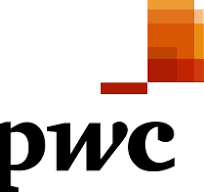

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.


## 1. Import the data

In [ ]:
#Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
# Conenct google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Assign variables
pwc = pd.read_csv('/content/drive/MyDrive/Data analysis-Oliver Vu/Database/02 Churn-Dataset.csv')

# 2. Data preparation & Cleaning

### Handle missing values


In [ ]:
pwc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,0,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


In [ ]:
pwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
pwc.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pwc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,0,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


In [ ]:
pwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
pwc.shape

(7043, 23)

In [ ]:
pwc['Churn'] = pwc['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
pwc['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [ ]:
#Convert empty strings into NA and drop rows with NA
pwc.replace(" ", np.nan, inplace=True)
pwc.dropna(subset=["TotalCharges"], inplace=True)
pwc['TotalCharges'] = pwc['TotalCharges'].astype(float)

In [ ]:
pwc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 3. Exploratory Data Analysis

### Basic Statistics


In [ ]:
pwc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785
std,0.368844,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000


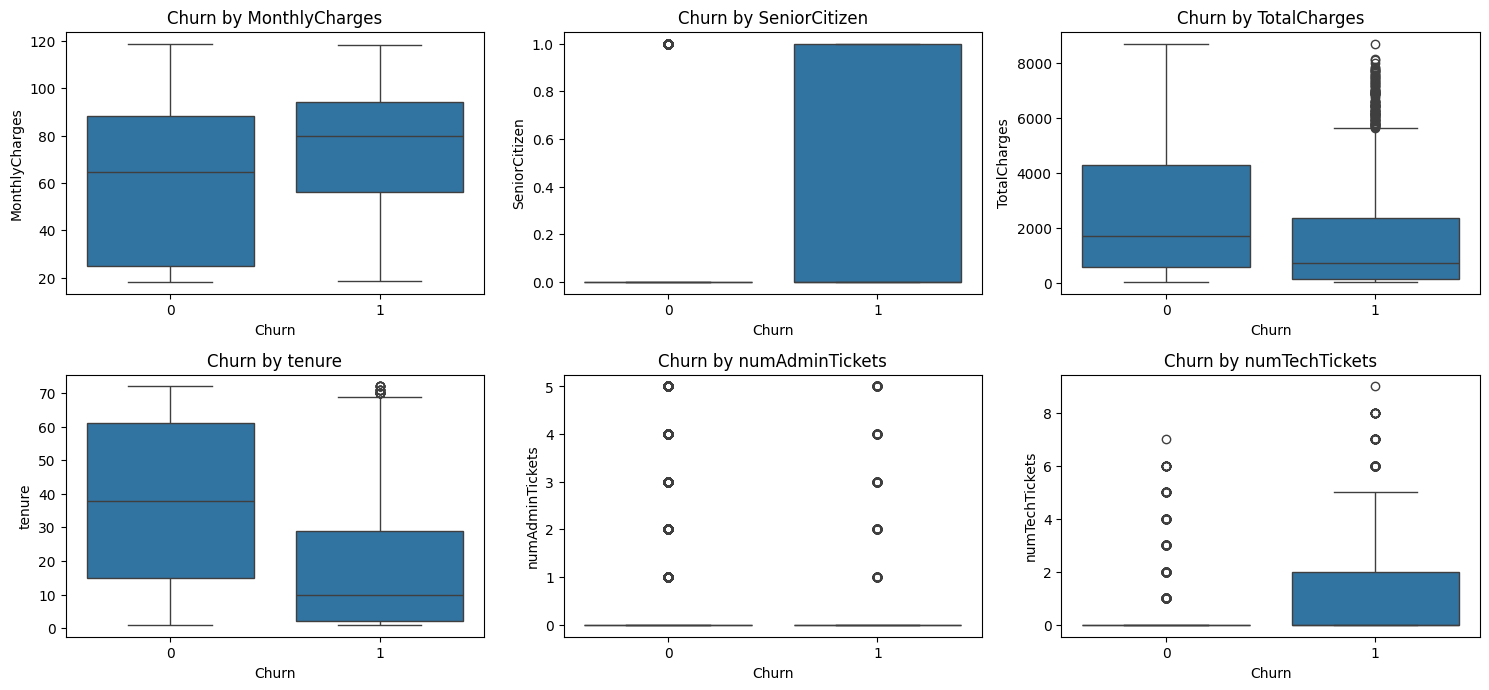

In [ ]:
#Numerical columns distribution
numerical_columns = ['MonthlyCharges','SeniorCitizen','TotalCharges','tenure','numAdminTickets','numTechTickets']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=column, data=pwc)
    plt.title(f'Churn by {column}')
plt.tight_layout()
plt.show()

In [ ]:
#Frequency counts for each categorical columns
categorical_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for col in categorical_columns:
  print(pwc[col].value_counts())


gender
Male      3549
Female    3483
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
StreamingTV
No                     2809
Y

In [ ]:
pwc['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

# 4. Churn Analysis (Customer demographic analysis)

### 4.1: Churn percentage


In [ ]:
# The average churn rate
avg_churn =  pwc['Churn'].mean()*100
print(f'Average churn rate: {avg_churn:.2f}%')

Average churn rate: 26.58%


In [ ]:
#Churn percentage
churn_percent = pwc["Churn"].value_counts() *100 / len(pwc)
churn_percent

,count
Churn,
0,73.421502
1,26.578498


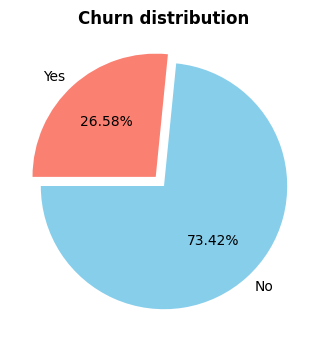

In [ ]:
#Count values
churn_count = pwc['Churn'].value_counts()

#Rename values
churn_label = {0: 'No', 1: 'Yes'}

#Exploding the "Yes" slide
explode = (0, 0.1)

#Ensure the values is in the correct order
value = [churn_count.get(0, 0), churn_count.get(1, 0)]
label = ['No', 'Yes']

#Customize colors
color = ['skyblue','salmon']

#Pie chart about Churn distribution
plt.figure(figsize = (4,4))
plt.pie(value,labels = label, autopct = '%1.2f%%', startangle=180, explode = explode, colors = color)
plt.title('Churn distribution',fontweight = 'bold',fontsize=12)
plt.show()

In [ ]:
pwc['Churn'].isna().sum()

np.int64(0)

In [ ]:
pwc['Churn'].describe()

,Churn
count,7032.000000
mean,0.265785
std,0.441782
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


###4.2: Customer segments

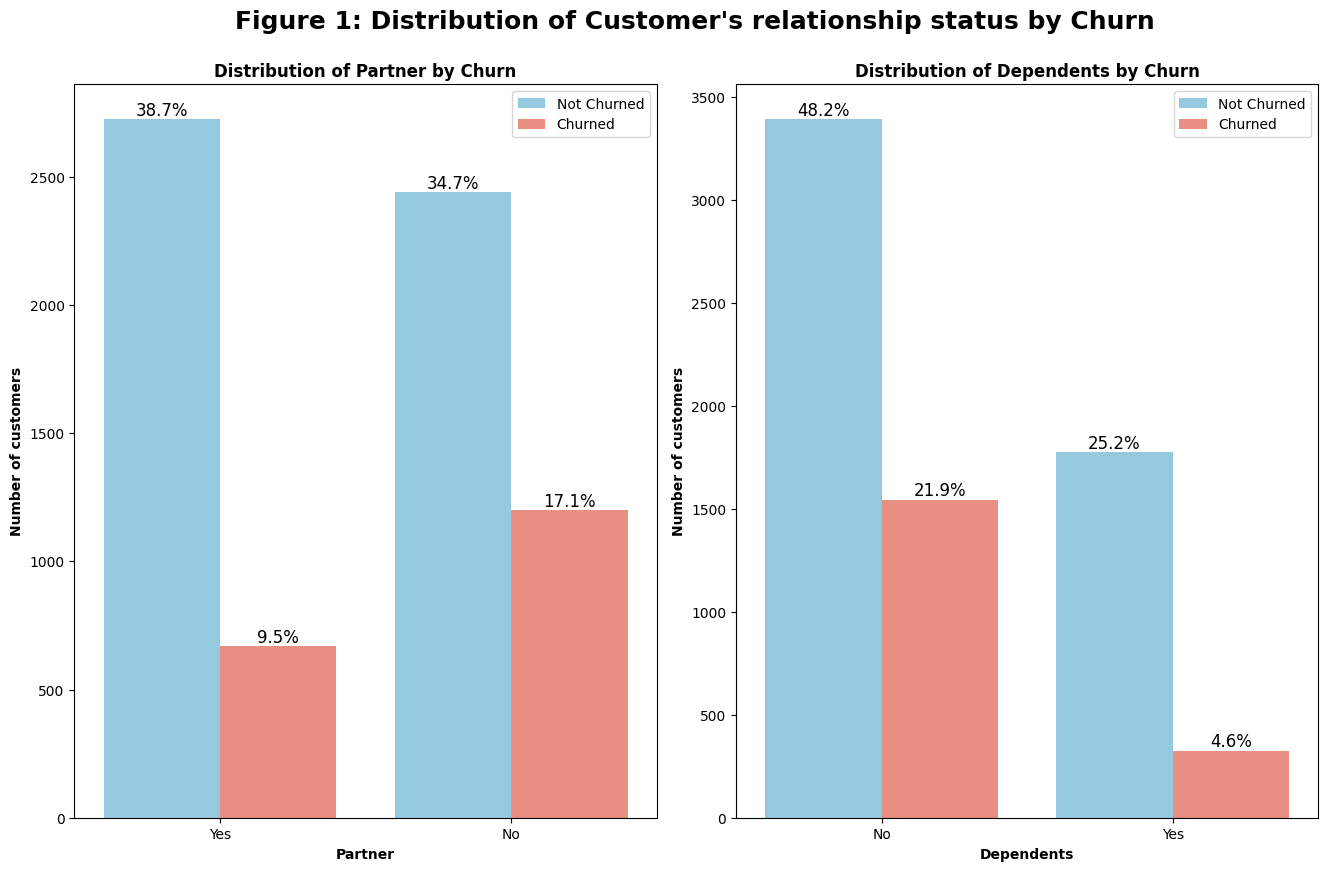

In [ ]:
#New vector
customer_segments = ['Partner','Dependents']

#Customize colors
color = ['skyblue','salmon']


#plot che chart
plt.figure(figsize=(20, 25))

for i, col in enumerate(customer_segments, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=col, hue='Churn', data=pwc, palette = color)
    plt.xlabel(f"{col}", fontweight = 'bold')
    plt.ylabel("Number of customers",fontweight = 'bold')
    plt.title(f'Distribution of {col} by Churn',fontweight = 'bold',fontsize=12)
    plt.legend(['Not Churned', 'Churned'])
    total = len(pwc)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
          percentage = f'{height / total * 100:.1f}%'
          x = p.get_x() + p.get_width() / 2
          y = p.get_y() + p.get_height()
          ax.annotate(percentage, (x, y), ha='center', va='bottom',fontsize = 12)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle("Figure 1: Distribution of Customer's relationship status by Churn",
             fontsize=18, fontweight='bold', x=0.35, y=0.96)
plt.show()

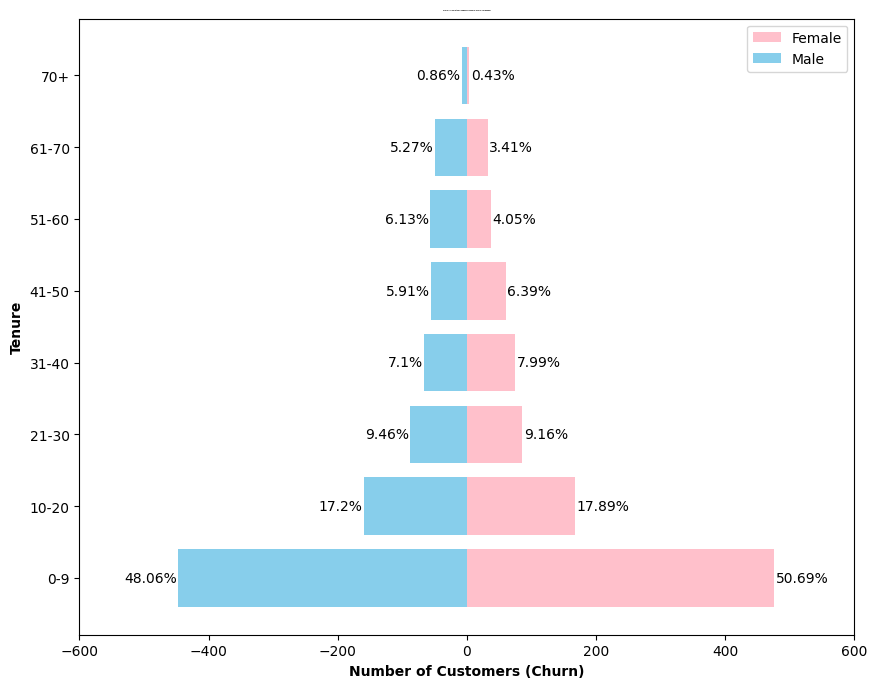

In [ ]:
#Create an categorical tenure
def categorize_tenure(tenure):
  if tenure < 10:
    return '0-9'
  elif tenure <= 20:
    return '10-20'
  elif tenure <= 30:
    return '21-30'
  elif tenure <= 40:
    return '31-40'
  elif tenure <= 50:
    return '41-50'
  elif tenure <= 60:
    return '51-60'
  elif tenure <= 70:
    return '61-70'
  else:
    return '70+'

pwc['TenureGroup'] = pwc['tenure'].apply(categorize_tenure)
#Filter customer who is churned
churn_df = pwc[pwc['Churn'] == 1]
tenure_groups = sorted(churn_df["TenureGroup"].unique())

#Count male and female in each tenure group
male_counts = []
female_counts = []


for tenure_group in tenure_groups:
  male_count = len(churn_df[(churn_df['TenureGroup'] == tenure_group) & (churn_df['gender'] == 'Male')])
  female_count = len(churn_df[(churn_df['TenureGroup'] == tenure_group) & (churn_df['gender'] == 'Female')])
  total_count = male_count + female_count
  male_counts.append(male_count)
  female_counts.append(female_count)

#Popuplation pyramid chart of Churn by gender and tenure
width = 0.4

fig = plt.figure(figsize=(10, 8))
plt.barh(tenure_groups, female_counts, color='pink', label='Female')
plt.barh(tenure_groups, male_counts, color='skyblue', label='Male', left=-np.array(male_counts))
plt.xlim(-600,600)

for i, v in enumerate(male_counts):
  plt.text(-v-2, i, f"{round(v / sum(male_counts) * 100, 2)}%", color='black', ha='right', va='center')

for i, v in enumerate(female_counts):
  plt.text(v + 2, i, f"{round(v / sum(female_counts) * 100, 2)}%", color='black', ha='left', va='center')

plt.xlabel('Number of Customers (Churn)',fontweight = 'bold')
plt.ylabel('Tenure',fontweight = 'bold')
plt.title('Figure 2: Population Pyramid of Churn by Tenure and Gender',fontweight = 'bold',fontsize=1)
plt.legend()
plt.show()




<ipython-input-24-130d069754fa>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])


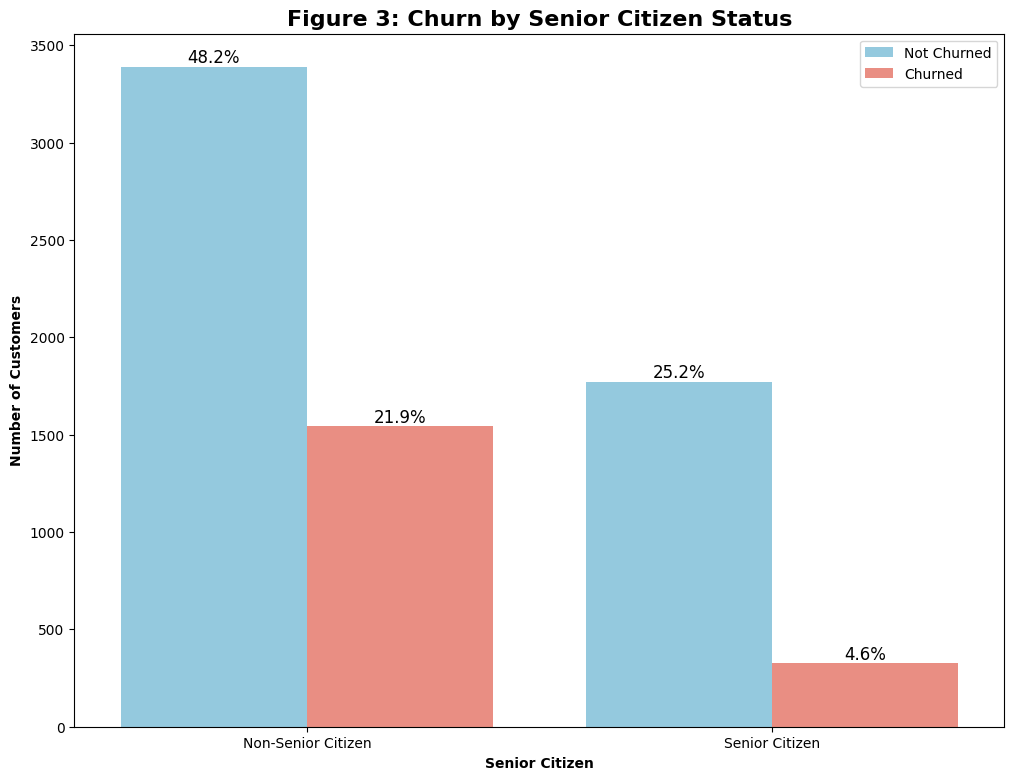

In [ ]:
#Count values
senior_citizen_churn = pwc.groupby(['SeniorCitizen', 'Churn'])['customerID'].count().unstack()

#Customize colors
color = ['skyblue', 'salmon']

#Create a bar chart
plt.figure(figsize =(12,9))
ax = sns.countplot(x=col, hue='Churn', data=pwc, palette = color)
for p in ax.patches:
        height = p.get_height()
        if height > 0:
          percentage = f'{height / total * 100:.1f}%'
          x = p.get_x() + p.get_width() / 2
          y = p.get_y() + p.get_height()
          ax.annotate(percentage, (x, y), ha='center', va='bottom',fontsize = 12)
ax.set_xlabel('Senior Citizen', fontweight='bold')
ax.set_ylabel('Number of Customers', fontweight='bold')
ax.set_title('Figure 3: Churn by Senior Citizen Status', fontweight='bold', fontsize=16)
ax.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
ax.legend(['Not Churned', 'Churned'])
plt.show()


###4.3: Serviced Used


In [ ]:
pwc['MonthlyCharges'].describe()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


In [ ]:
def monthly_payment(monthly_charges):
  if monthly_charges <= 40:
    return 'Low'
  elif 40 < monthly_charges <= 60:
    return 'Medium'
  elif 60 < monthly_charges <= 80:
    return 'High'
  else:
    return 'Premium'

pwc['MonthlyPayment'] = pwc['MonthlyCharges'].apply(monthly_payment)



<ipython-input-27-73711e97ef43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_churn_phone["MonthlyPayment"] = pd.Categorical(filtered_churn_phone["MonthlyPayment"], categories=payment_order, ordered=True)
<ipython-input-27-73711e97ef43>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_churn_multilines["MonthlyPayment"] = pd.Categorical(filtered_churn_multilines["MonthlyPayment"], categories=payment_order, ordered=True)


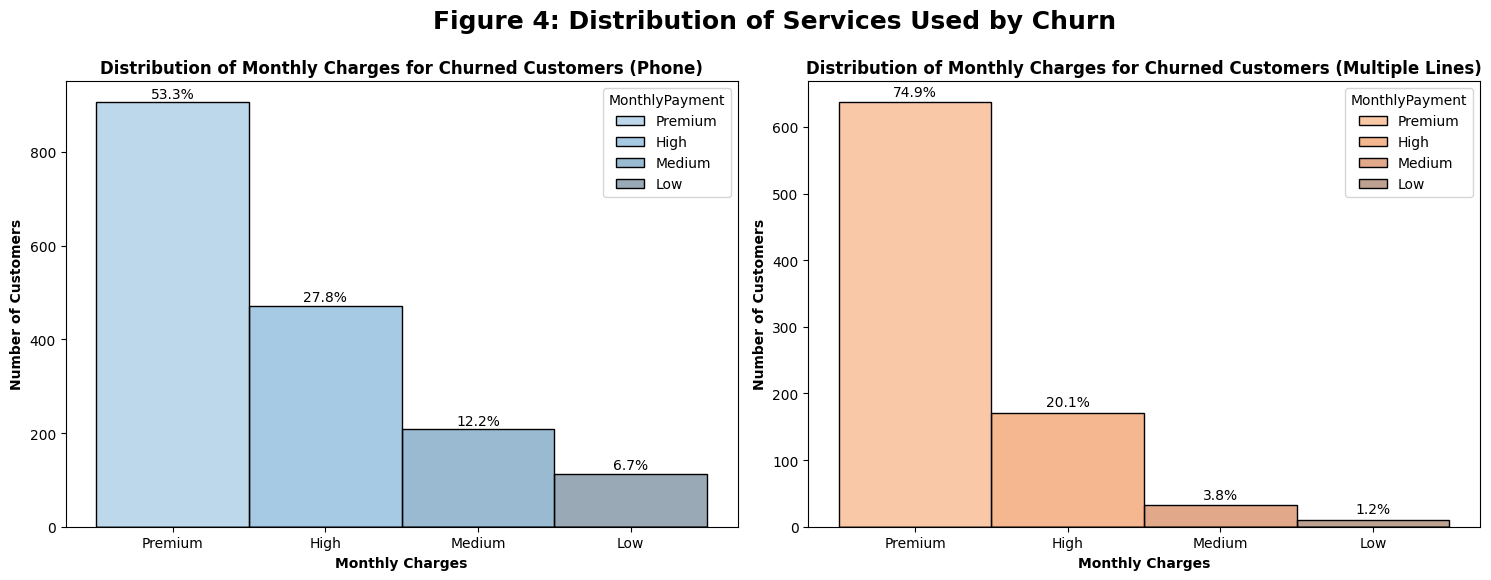

In [ ]:
#Filter data
filtered_churn_phone = pwc[(pwc['Churn'] == 1) &(pwc['PhoneService'] == 'Yes')]

payment_order = ['Premium','High','Medium','Low']
filtered_churn_phone["MonthlyPayment"] = pd.Categorical(filtered_churn_phone["MonthlyPayment"], categories=payment_order, ordered=True)

filtered_churn_multilines = pwc[(pwc['Churn'] == 1) &(pwc['MultipleLines'] == 'Yes')]
filtered_churn_multilines["MonthlyPayment"] = pd.Categorical(filtered_churn_multilines["MonthlyPayment"], categories=payment_order, ordered=True)



fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#Plot 1
ax1 = sns.histplot(data=filtered_churn_phone, x="MonthlyPayment", hue="MonthlyPayment", palette="Blues_d", ax=axes[0])
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    if height > 0:
        percentage = f"{(height / filtered_churn_phone.shape[0] * 100):.1f}%"
        ax1.text(p.get_x() + p.get_width() / 2, height + 10, percentage, ha="center")
ax1.set_title('Distribution of Monthly Charges for Churned Customers (Phone)',fontweight = 'bold',fontsize=12)
ax1.set_xlabel('Monthly Charges',fontweight = 'bold')
ax1.set_ylabel('Number of Customers',fontweight = 'bold')



#Plot 2
ax2 = sns.histplot(data=filtered_churn_multilines, x='MonthlyPayment', hue='MonthlyPayment',palette = 'Oranges_d', ax=axes[1])
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    if height > 0:
        percentage = f"{(height / filtered_churn_multilines.shape[0] * 100):.1f}%"
        ax2.text(p.get_x() + p.get_width() / 2, height + 10, percentage, ha="center")
ax2.set_title('Distribution of Monthly Charges for Churned Customers (Multiple Lines)',fontweight = 'bold',fontsize=12)
ax2.set_xlabel('Monthly Charges',fontweight = 'bold')
ax2.set_ylabel('Number of Customers',fontweight = 'bold')

plt.tight_layout()
plt.subplots_adjust(top=0.84)
plt.suptitle('Figure 4: Distribution of Services Used by Churn',fontsize=18, fontweight='bold', x=0.52, y=0.96)
plt.show()


<ipython-input-28-25958c8f1e89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_churn_streaing_tv["MonthlyPayment"] = pd.Categorical(filtered_churn_streaing_tv ["MonthlyPayment"], categories=payment_order, ordered=True)
<ipython-input-28-25958c8f1e89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_churn_streaming_movies["MonthlyPayment"] = pd.Categorical(filtered_churn_streaming_movies["MonthlyPayment"], categories=payment_order, ordered=True)


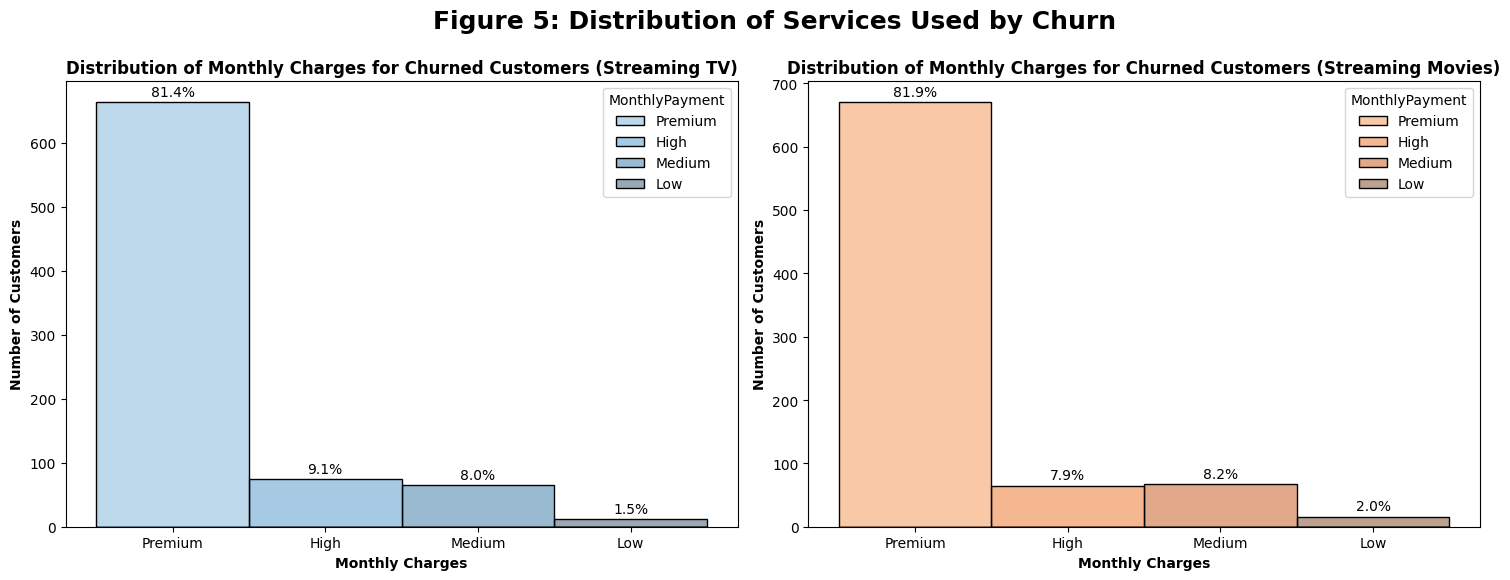

In [ ]:
#Filter data
filtered_churn_streaing_tv = pwc[(pwc['Churn'] == 1) &(pwc['StreamingTV'] == 'Yes')]

payment_order = ['Premium','High','Medium','Low']
filtered_churn_streaing_tv["MonthlyPayment"] = pd.Categorical(filtered_churn_streaing_tv ["MonthlyPayment"], categories=payment_order, ordered=True)

filtered_churn_streaming_movies = pwc[(pwc['Churn'] == 1) &(pwc['StreamingMovies'] == 'Yes')]
filtered_churn_streaming_movies["MonthlyPayment"] = pd.Categorical(filtered_churn_streaming_movies["MonthlyPayment"], categories=payment_order, ordered=True)



fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#Plot 1
ax1 = sns.histplot(data=filtered_churn_streaing_tv, x="MonthlyPayment", hue="MonthlyPayment", palette="Blues_d", ax=axes[0])
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    if height > 0:
        percentage = f"{(height / filtered_churn_streaing_tv.shape[0] * 100):.1f}%"
        ax1.text(p.get_x() + p.get_width() / 2, height + 10, percentage, ha="center")
ax1.set_title('Distribution of Monthly Charges for Churned Customers (Streaming TV)',fontweight = 'bold',fontsize=12)
ax1.set_xlabel('Monthly Charges',fontweight = 'bold')
ax1.set_ylabel('Number of Customers',fontweight = 'bold')


#Plot 2
ax2 = sns.histplot(data=filtered_churn_streaming_movies, x='MonthlyPayment', hue='MonthlyPayment',palette = 'Oranges_d', ax=axes[1])
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    if height > 0:
        percentage = f"{(height / filtered_churn_streaming_movies.shape[0] * 100):.1f}%"
        ax2.text(p.get_x() + p.get_width() / 2, height + 10, percentage, ha="center")
ax2.set_title('Distribution of Monthly Charges for Churned Customers (Streaming Movies)',fontweight = 'bold',fontsize=12)
ax2.set_xlabel('Monthly Charges',fontweight = 'bold')
ax2.set_ylabel('Number of Customers',fontweight = 'bold')

plt.tight_layout()
plt.subplots_adjust(top=0.84)
plt.suptitle('Figure 5: Distribution of Services Used by Churn',fontsize=18, fontweight='bold', x=0.52, y=0.96)
plt.show()


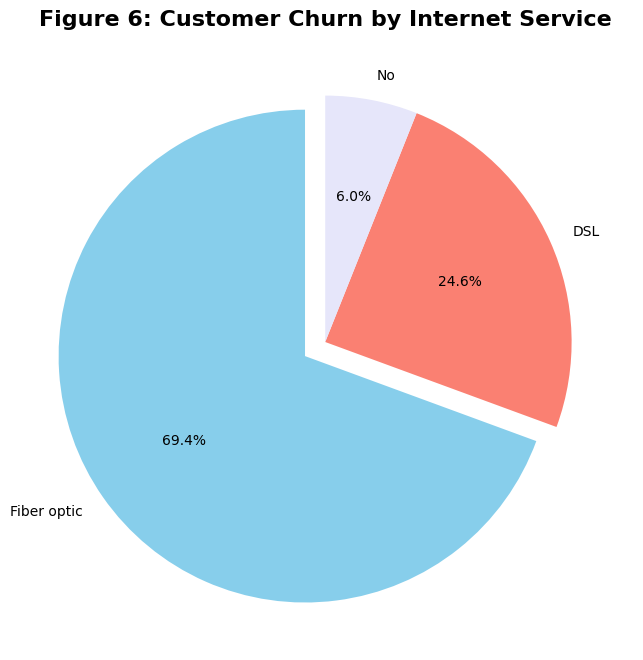

In [ ]:
#filter data
churned_customers = pwc[pwc['Churn'] == 1]
internet_service_churn = churned_customers['InternetService'].value_counts()
colors = ['skyblue','salmon','#E6E6FA']

#Explode first slice ("Fiber optic")
explode = (0.1, 0, 0)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(internet_service_churn, labels=internet_service_churn.index, autopct='%1.1f%%', startangle=90,colors = colors,explode = explode)
plt.title('Figure 6: Customer Churn by Internet Service',fontweight = "bold",fontsize = 16)
plt.show()


###4.4: Payment method

<ipython-input-30-43e28b8e3a94>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaperlessBilling', data=filtered_churn_payment, palette=pb_colors, ax=ax1)
<ipython-input-30-43e28b8e3a94>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=filtered_churn_payment, palette=pm_colors, ax=ax2)


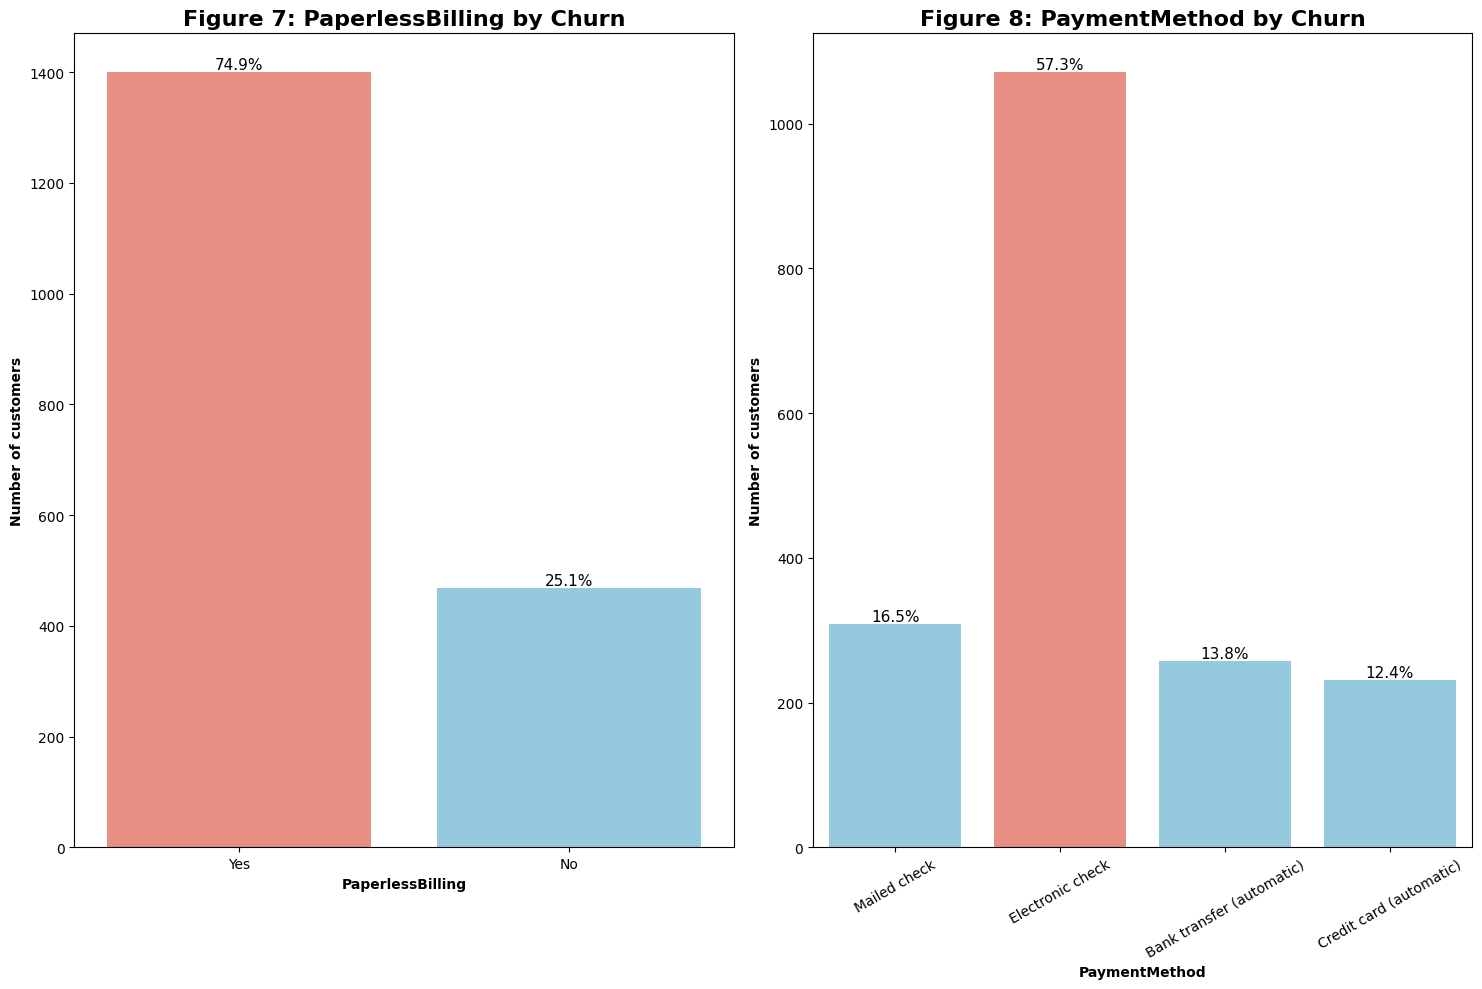

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter churned customers
filtered_churn_payment = pwc[pwc['Churn'] == 1]
total = filtered_churn_payment.shape[0]

#Prepare colors
pb_colors = ['salmon' if val == 'Yes' else 'skyblue'
             for val in filtered_churn_payment['PaperlessBilling'].unique()]


pm_colors = ['salmon' if val == 'Electronic check' else 'skyblue'
             for val in filtered_churn_payment['PaymentMethod'].unique()]

#Create subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

#Plot PaperlessBilling
sns.countplot(x='PaperlessBilling', data=filtered_churn_payment, palette=pb_colors, ax=ax1)
ax1.set_title('Figure 7: PaperlessBilling by Churn', fontweight='bold', fontsize=16)
ax1.set_xlabel('PaperlessBilling', fontweight='bold')
ax1.set_ylabel('Number of customers', fontweight='bold')

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        percent = f'{height / total * 100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax1.annotate(percent, (x, y), ha='center', va='bottom', fontsize=11)

#Plot PaymentMethod
sns.countplot(x='PaymentMethod', data=filtered_churn_payment, palette=pm_colors, ax=ax2)
ax2.set_title('Figure 8: PaymentMethod by Churn', fontweight='bold', fontsize=16)
ax2.set_xlabel('PaymentMethod', fontweight='bold')
ax2.set_ylabel('Number of customers', fontweight='bold')
ax2.tick_params(axis='x', rotation=30)

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        percent = f'{height / total * 100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax2.annotate(percent, (x, y), ha='center', va='bottom', fontsize=11)

#Adjust layout
plt.tight_layout()
plt.show()


###4.5:Contract type breakdown

<ipython-input-31-e2198ded23bd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


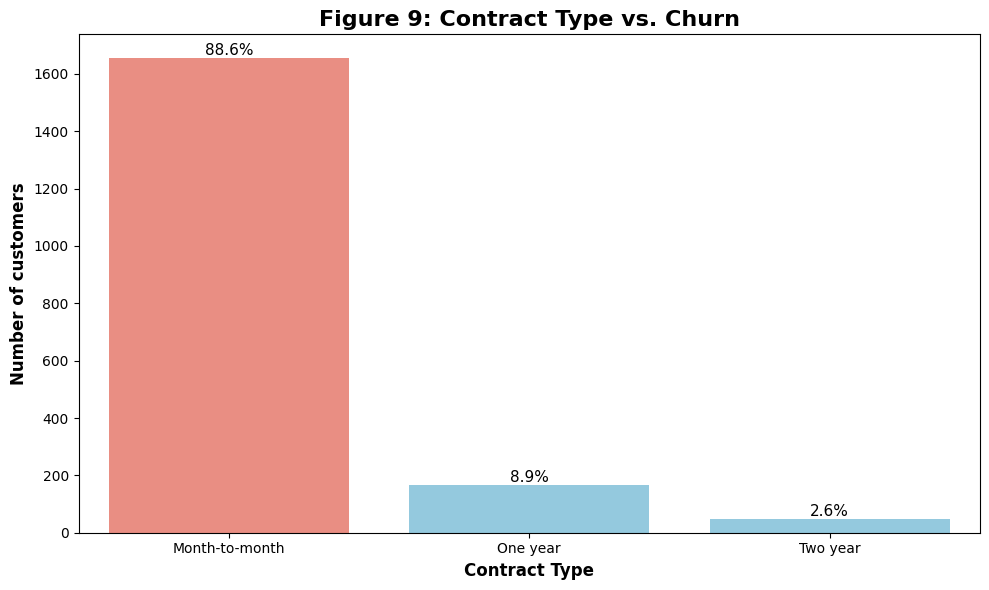

In [ ]:

#Filter data
filtered_churn_contract = pwc[pwc['Churn'] == 1].copy()

#Define desired contract order
category_order = ['Month-to-month', 'One year', 'Two year']
filtered_churn_contract['Contract'] = pd.Categorical(filtered_churn_contract['Contract'], categories=category_order, ordered=True)

#Define custom colors
contract_colors = ['salmon' if val == 'Month-to-month' else 'skyblue' for val in category_order]

#Plot the chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Contract',
    data=filtered_churn_contract,
    order=category_order,
    palette=contract_colors
)

total = filtered_churn_contract.shape[0]
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = f'{height / total * 100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax.annotate(percent, (x, y), ha='center', va='bottom', fontsize=11)

plt.title('Figure 9: Contract Type vs. Churn', fontsize=16, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of customers', fontsize=12, fontweight='bold')


plt.tight_layout()
plt.show()


###4.6:Customer support

<ipython-input-32-67438acc7534>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
<ipython-input-32-67438acc7534>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


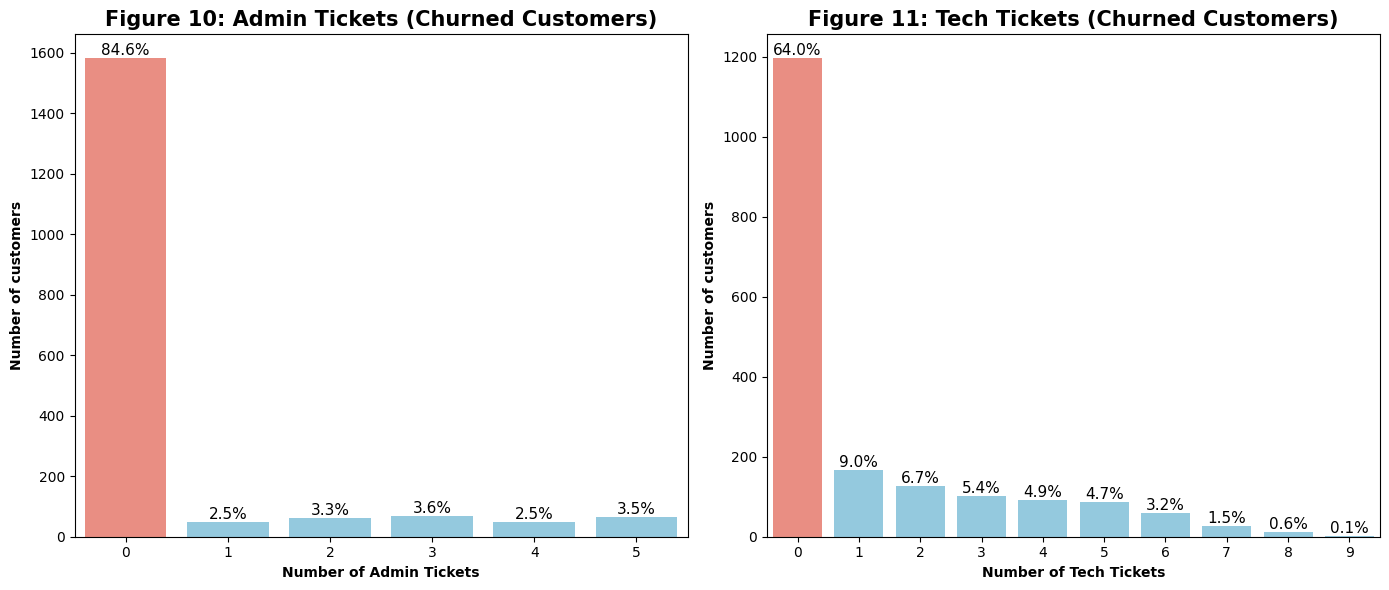

In [ ]:
#filter data
churned_customers = pwc[pwc['Churn'] == 1]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define custom colors

admin_ticket_colors = ['salmon' if x == 0 else 'skyblue'
                       for x in sorted(churned_customers['numAdminTickets'].unique())]

tech_ticket_colors = ['salmon' if x == 0 else 'skyblue'
                      for x in sorted(churned_customers['numTechTickets'].unique())]

#Plot 1
ax = sns.countplot(
    x='numAdminTickets',
    data=churned_customers,
    palette=admin_ticket_colors,
    ax=axes[0]
)

total = churned_customers.shape[0]
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = f'{height / total * 100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)

axes[0].set_title("Figure 10: Admin Tickets (Churned Customers)", fontsize=15, fontweight="bold")
axes[0].set_xlabel("Number of Admin Tickets", fontweight="bold")
axes[0].set_ylabel("Number of customers", fontweight="bold")

#Plot 2
ax = sns.countplot(
    x='numTechTickets',
    data=churned_customers,
    palette=tech_ticket_colors,
    ax=axes[1]
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = f'{height / total * 100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)

axes[1].set_title("Figure 11: Tech Tickets (Churned Customers)", fontsize=15, fontweight="bold")
axes[1].set_xlabel("Number of Tech Tickets", fontweight="bold")
axes[1].set_ylabel("Number of customers", fontweight="bold")

plt.tight_layout()
plt.show()


In [ ]:
pwc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,TenureGroup,MonthlyPayment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,0-9,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,0,31-40,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1,0-9,Medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,41-50,Medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1,0-9,High
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,0,0,1,0-9,Premium
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0,0,21-30,Premium
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0,0,10-20,Low
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,1,21-30,Premium
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,0,61-70,Medium


# 5. Feature Engineering

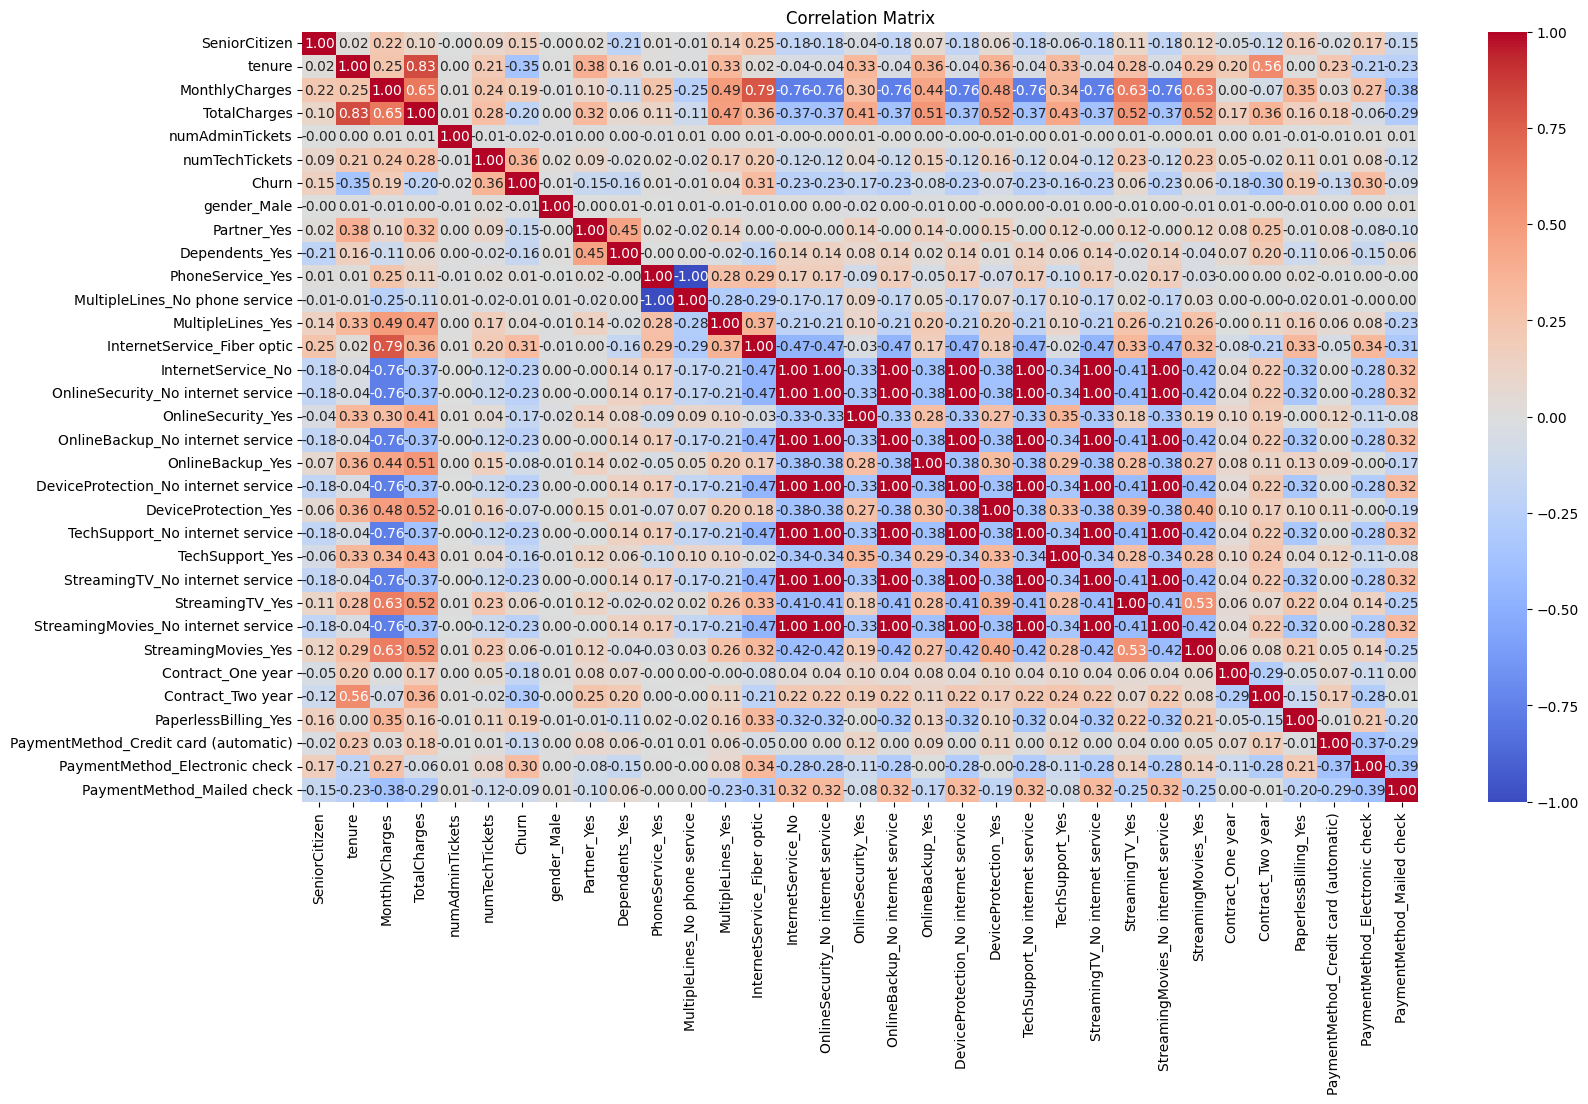

In [ ]:
#Convert all categorical columns into binary
correlation= pwc.drop(['customerID','MonthlyPayment','TenureGroup'], axis=1)
correlation = pd.get_dummies(correlation , drop_first=True)
correlation.head(10)

#Plot the heat map
plt.figure(figsize=(18, 10))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


###5.1: Data encoding

In [ ]:
pwc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
pwc_encoded = pwc.drop(['customerID','MonthlyPayment','TenureGroup'], axis=1)

pwc_encoded['gender'] = pwc_encoded['gender'].map({'Male': 1, 'Female': 0})
pwc_encoded['Partner'] = pwc_encoded['Partner'].map({'Yes': 1, 'No': 0})
pwc_encoded['Dependents'] = pwc_encoded['Dependents'].map({'Yes': 1, 'No': 0})
pwc_encoded['PhoneService'] = pwc_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
pwc_encoded['PaperlessBilling'] = pwc_encoded['PaperlessBilling'].map({'Yes': 1, 'No': 0})
pwc_encoded['InternetService'] = pwc_encoded['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
pwc_encoded['Contract'] = pwc_encoded['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
pwc_encoded['PaymentMethod'] = pwc_encoded['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
pwc_encoded['MultipleLines'] = pwc_encoded['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
pwc_encoded['OnlineSecurity'] = pwc_encoded['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
pwc_encoded['OnlineBackup'] = pwc_encoded['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
pwc_encoded['DeviceProtection'] = pwc_encoded['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
pwc_encoded['TechSupport'] = pwc_encoded['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
pwc_encoded['StreamingTV'] = pwc_encoded['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
pwc_encoded['StreamingMovies'] = pwc_encoded['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})

pwc_encoded.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0,0,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,0,0,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0,3,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,0,0,1


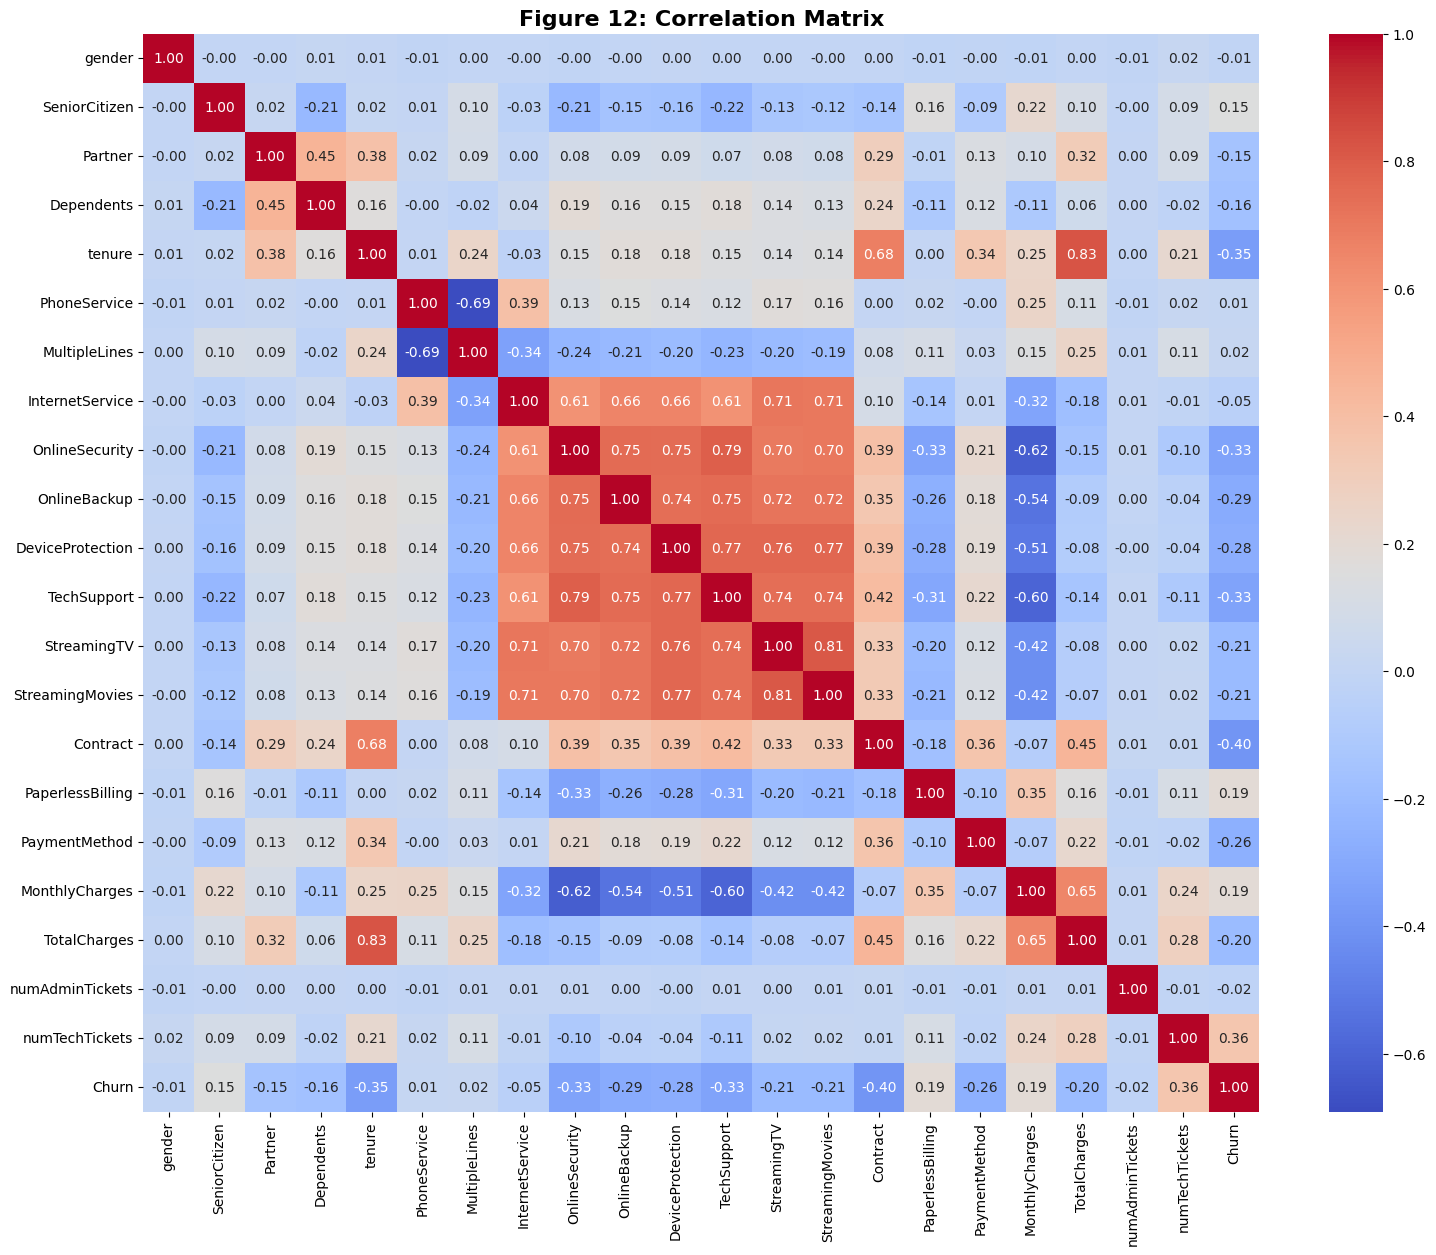

In [ ]:
#Plot the heat map
plt.figure(figsize=(18, 14))
sns.heatmap(pwc_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Figure 12: Correlation Matrix',fontsize = 16,fontweight = 'bold')
plt.show()

###5.2: Standardization


In [ ]:
#Numerical columns that need to be stadardize
numerical_columns = ['MonthlyCharges','SeniorCitizen','TotalCharges','tenure','numAdminTickets','numTechTickets']

#Create a scaler object
scaler = StandardScaler()

pwc_encoded[numerical_columns] = scaler.fit_transform(pwc_encoded[numerical_columns])

# Dataset after standardized having a mean=0, std=1
print(pwc_encoded[numerical_columns].describe())


pwc_encoded.head(10)

       MonthlyCharges  SeniorCitizen  TotalCharges        tenure  \
count    7.032000e+03   7.032000e+03  7.032000e+03  7.032000e+03   
mean     6.062651e-17   2.627149e-17 -1.119064e-16 -1.126643e-16   
std      1.000071e+00   1.000071e+00  1.000071e+00  1.000071e+00   
min     -1.547283e+00  -4.403271e-01 -9.990692e-01 -1.280248e+00   
25%     -9.709769e-01  -4.403271e-01 -8.302488e-01 -9.542963e-01   
50%      1.845440e-01  -4.403271e-01 -3.908151e-01 -1.394171e-01   
75%      8.331482e-01  -4.403271e-01  6.668271e-01  9.199259e-01   
max      1.793381e+00   2.271039e+00  2.824261e+00  1.612573e+00   

       numAdminTickets  numTechTickets  
count     7.032000e+03    7.032000e+03  
mean      3.637591e-17   -4.850121e-17  
std       1.000071e+00    1.000071e+00  
min      -4.042388e-01   -3.359369e-01  
25%      -4.042388e-01   -3.359369e-01  
50%      -4.042388e-01   -3.359369e-01  
75%      -4.042388e-01   -3.359369e-01  
max       3.520930e+00    6.858910e+00  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0,-0.440327,1,0,-1.280248,0,2,0,0,1,0,0,0,0,0,1,0,-1.161694,-0.994194,-0.404239,-0.335937,0
1,1,-0.440327,0,0,0.064303,1,0,0,1,0,1,0,0,0,1,0,1,-0.260878,-0.173740,-0.404239,-0.335937,0
2,1,-0.440327,0,0,-1.239504,1,0,0,1,1,0,0,0,0,0,1,1,-0.363923,-0.959649,-0.404239,-0.335937,1
3,1,-0.440327,0,0,0.512486,0,2,0,1,0,1,1,0,0,1,0,2,-0.747850,-0.195248,-0.404239,2.062345,0
4,0,-0.440327,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,0,0.196178,-0.940457,-0.404239,-0.335937,1
5,0,-0.440327,0,0,-0.995040,1,1,1,0,0,1,0,1,1,0,1,0,1.158489,-0.645369,-0.404239,-0.335937,1
6,1,-0.440327,0,1,-0.424625,1,1,1,0,1,0,0,1,0,0,1,3,0.807802,-0.147313,-0.404239,-0.335937,0
7,0,-0.440327,0,0,-0.913552,0,2,0,1,0,0,0,0,0,0,0,1,-1.165018,-0.874169,-0.404239,-0.335937,0
8,0,-0.440327,1,0,-0.180161,1,1,1,0,0,1,1,1,1,0,1,0,1.329677,0.336516,-0.404239,1.262918,1
9,1,-0.440327,0,1,1.205134,1,0,0,1,1,0,0,0,0,1,0,2,-0.287470,0.531476,-0.404239,-0.335937,0


# 6. Modelling


###6.1: Logistic regression model

In [ ]:
#Define IV and DV
x = pwc_encoded.drop('Churn', axis=1)
y = pwc_encoded['Churn']

#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Applying logistic regression model
log_model = LogisticRegression(max_iter=1000)

#Train the model
log_model.fit(x_train, y_train)

#Make predictions on the test set
y_pred = log_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1411  138]
 [ 178  383]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1549
           1       0.74      0.68      0.71       561

    accuracy                           0.85      2110
   macro avg       0.81      0.80      0.80      2110
weighted avg       0.85      0.85      0.85      2110



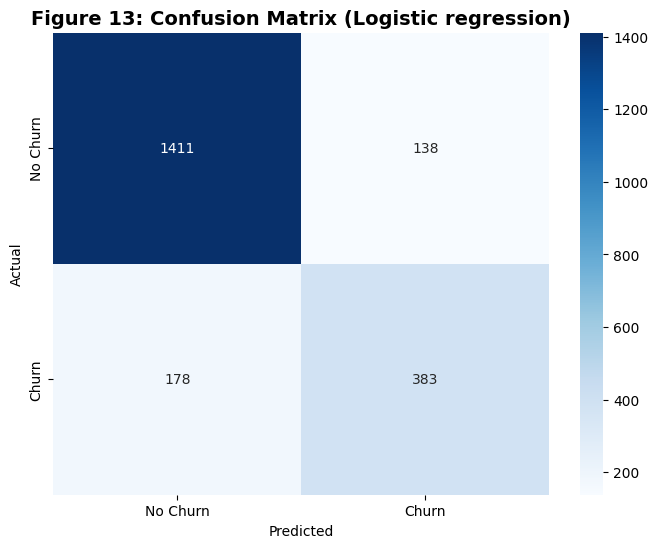

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figure 13: Confusion Matrix (Logistic regression)',fontsize = 14,fontweight = "bold")
plt.show()

###6.2: Decision tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

#Set up parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

#Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.8524947381453509


In [ ]:
#Use the best estimator
best_dt = grid_search.best_estimator_
best_dt.fit(x_train, y_train)
y_pred = best_dt.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1418  131]
 [ 219  342]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1549
           1       0.72      0.61      0.66       561

    accuracy                           0.83      2110
   macro avg       0.79      0.76      0.78      2110
weighted avg       0.83      0.83      0.83      2110



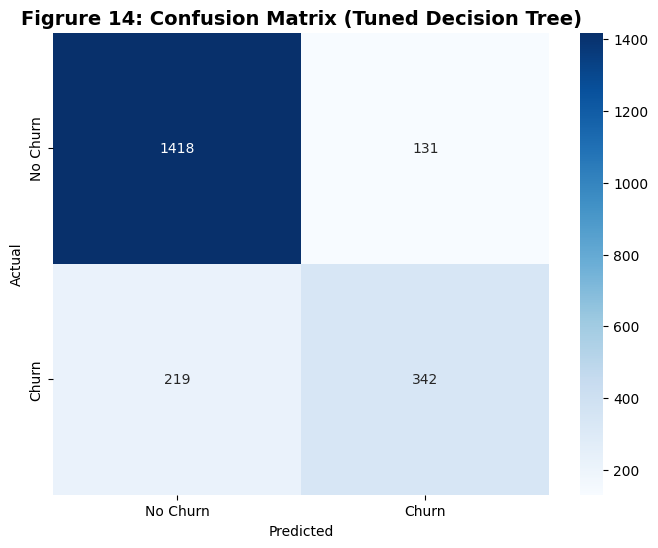

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figrure 14: Confusion Matrix (Tuned Decision Tree)', fontweight = 'bold',fontsize = 14)
plt.show()

<ipython-input-80-83d2c9a59c3b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=freture_importance, palette='Blues_d')


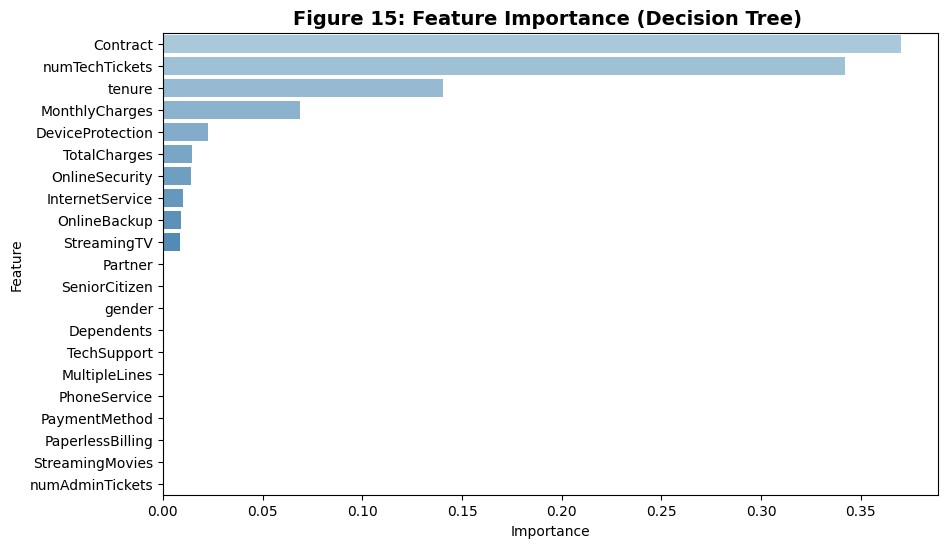

In [ ]:
#Get the feature importance from Decision tree model
freture_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': best_dt.feature_importances_})
freture_importance = freture_importance.sort_values(by='Importance', ascending=False)

#Plot char chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=freture_importance, palette='Blues_d')
plt.title('Figure 15: Feature Importance (Decision Tree) ',fontsize = 14, fontweight = 'bold' )
plt.show()

###6.3: XG Boost

In [ ]:
xg_boost = xgb.XGBClassifier(random_state=42)

# Train the model
xg_boost.fit(x_train, y_train)

# Make predictions
y_pred = xg_boost.predict(x_test)


param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xg_boost, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.8648893978787504


In [ ]:
best_xgboost = grid_search.best_estimator_

# Train the model
best_xgboost.fit(x_train, y_train)

# Make predictions
y_pred = best_xgboost.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1414  135]
 [ 171  390]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1549
           1       0.74      0.70      0.72       561

    accuracy                           0.85      2110
   macro avg       0.82      0.80      0.81      2110
weighted avg       0.85      0.85      0.85      2110



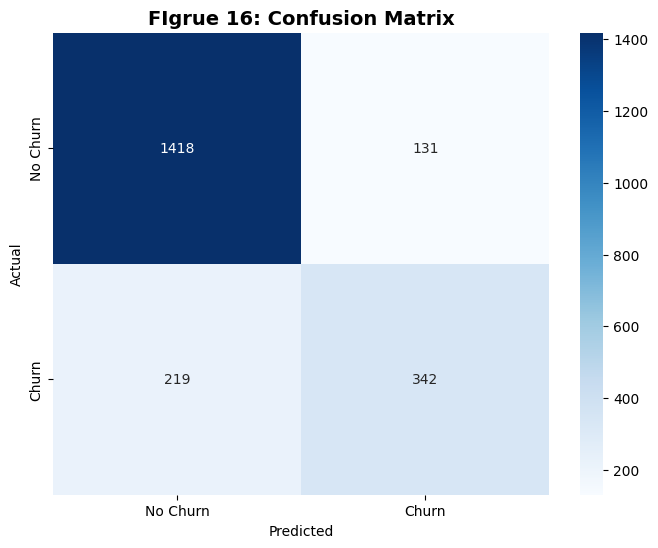

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('FIgrue 16: Confusion Matrix',fontsize = 14,fontweight = 'bold')
plt.show()

<ipython-input-75-c1f754f66b62>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=freture_importance, palette='Blues_d')


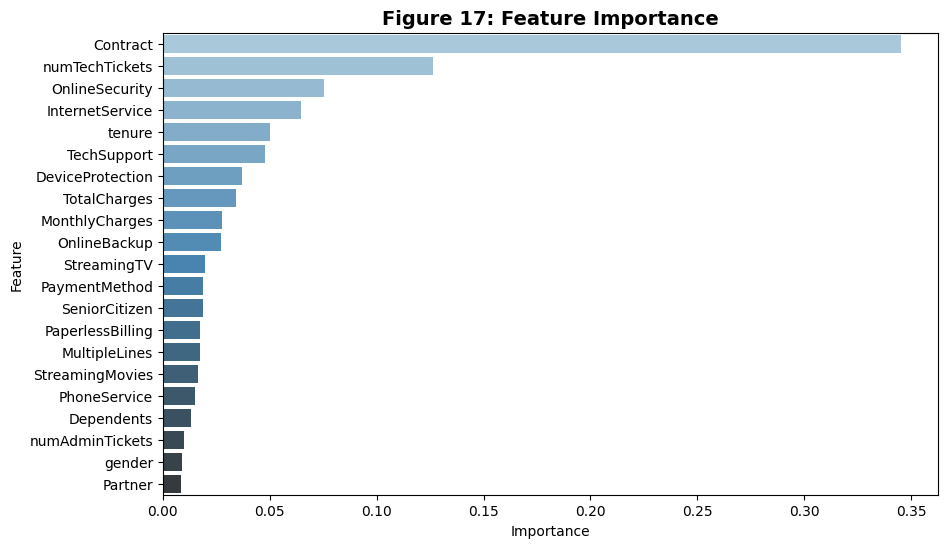

In [ ]:
#Get the feature importance from XGB model
freture_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': best_xgboost.feature_importances_})
freture_importance = freture_importance.sort_values(by='Importance', ascending=False)

#Plot char chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=freture_importance, palette='Blues_d')
plt.title('Figure 17: Feature Importance',fontweight ='bold',fontsize = 14)
plt.show()